HEART FAILURE PREDICTION

Rajeev K R -ME20BTECH11039

VAISHNAVI LAKSHMI PRIYA S -ME20BTECH11050

In [ ]:
!pip install opendatasets

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import opendatasets as od
import datetime
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import folium

In [ ]:
od.download("https://www.kaggle.com/datasets/mchirico/montcoalert?datasetId=100&sortBy=voteCount")

For this capstone project we will be analyzing some 911 call data from Kaggle.

The data contains the following fields:
lat : String variable, Latitude

lng: String variable, Longitude

desc: String variable, Description of the Emergency Call

zip: String variable, Zipcode

title: String variable, Title

timeStamp: String variable, YYYY-MM-DD HH:MM:SS

twp: String variable, Township

addr: String variable, Address

e: String variable, Dummy variable (always 1)

In [ ]:
#loading data
file_name = ('montcoalert/911.csv')
df =pd.read_csv(file_name)
df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [ ]:
df.shape

(663522, 9)

In [ ]:
df.title.value_counts()

Traffic: VEHICLE ACCIDENT -    148372
Traffic: DISABLED VEHICLE -     47909
Fire: FIRE ALARM                38336
EMS: FALL VICTIM                34676
EMS: RESPIRATORY EMERGENCY      34248
                                ...  
EMS: DISABLED VEHICLE               1
Fire: PRISONER IN CUSTODY           1
Fire: GENERAL WEAKNESS              1
Fire: SUSPICIOUS                    1
Fire: BARRICADED SUBJECT            1
Name: title, Length: 148, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   lat               663522 non-null  float64       
 1   lng               663522 non-null  float64       
 2   desc              663522 non-null  object        
 3   title             663522 non-null  object        
 4   timeStamp         663522 non-null  datetime64[ns]
 5   addr              663522 non-null  object        
 6   e                 663522 non-null  int64         
 7   Reason            0 non-null       float64       
 8   Hour              663522 non-null  int64         
 9   Month             663522 non-null  int64         
 10  Day of Week       663522 non-null  object        
 11  Date              663522 non-null  object        
 12  Reasonms          663522 non-null  object        
 13  Reasonm           663522 non-null  object        
 14  Reas

In [ ]:
df['lat'].unique()
len(df['lat'].unique())

25949

In [ ]:
df['lng'].unique()
len(df['lng'].unique())

25980

In [ ]:
df['desc'].unique()
len(df['desc'].unique())

663282

In [ ]:
df['title'].unique()
len(df['title'].unique())

148

In [ ]:
df['timeStamp'].unique()
len(df['timeStamp'].unique())

640754

In [ ]:
df['addr'].unique()
len(df['addr'].unique())

41292

In [ ]:
#checking for missimg values
df.isnull().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

In [ ]:
df.drop(['twp','zip'],axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   title      663522 non-null  object 
 4   timeStamp  663522 non-null  object 
 5   addr       663522 non-null  object 
 6   e          663522 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 35.4+ MB


In [ ]:
df.describe()

,lat,lng,e
count,663522.000000,663522.000000,663522.0
mean,40.158162,-75.300105,1.0
std,0.220641,1.672884,0.0
min,0.000000,-119.698206,1.0
25%,40.100344,-75.392735,1.0
50%,40.143927,-75.305143,1.0
75%,40.229008,-75.211865,1.0
max,51.335390,87.854975,1.0


In [ ]:
type(df['timeStamp'].iloc[0])

str

In [ ]:
#to change timeStamps from strings toDateTime objects
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
#unique titles in the column
df.title.nunique()

148

In [ ]:
%matplotlib inline

In [ ]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])
#most common reason for a 911 call based off of the above column
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

In [ ]:
df['Reason'] =df['Reason'].astype(float)
# df['Reason'].value_counts()
print(df.dtypes)

lat                        float64
lng                        float64
desc                        object
title                       object
timeStamp           datetime64[ns]
addr                        object
e                            int64
Reason                     float64
Hour                         int64
Month                        int64
Day of Week                 object
Date                        object
Reasonms                    object
Reasonm                     object
Reason_sub_categ            object
dtype: object


In [ ]:

df['Reason_sub_categ'] = df.title.str.split(':', expand=True)[1].str.replace(' -', '')
#most common reason for a 911 call based off of the above column
df['Reason_sub_categ'].value_counts()

 VEHICLE ACCIDENT         184749
 DISABLED VEHICLE          47917
 FIRE ALARM                38452
 FALL VICTIM               34683
 RESPIRATORY EMERGENCY     34250
                           ...  
 ARMED SUBJECT                 2
 ANIMAL COMPLAINT              1
 PRISONER IN CUSTODY           1
 HIT + RUN                     1
 FOOT PATROL                   1
Name: Reason_sub_categ, Length: 88, dtype: int64

<BarContainer object of 10 artists>

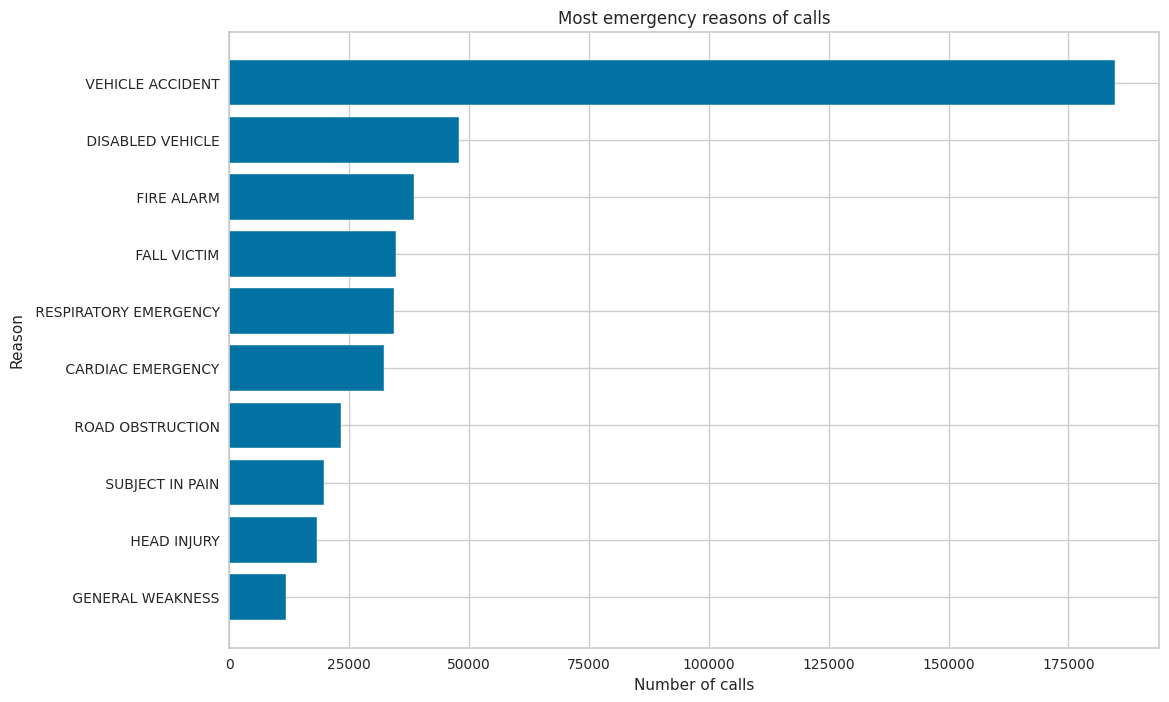

In [ ]:
df_em = df.Reason_sub_categ.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(df_em.index)
y = list(df_em.values)
x.reverse()
y.reverse()

plt.title("Most emergency reasons of calls")
plt.ylabel("Reason")
plt.xlabel("Number of calls")

plt.barh(x, y)

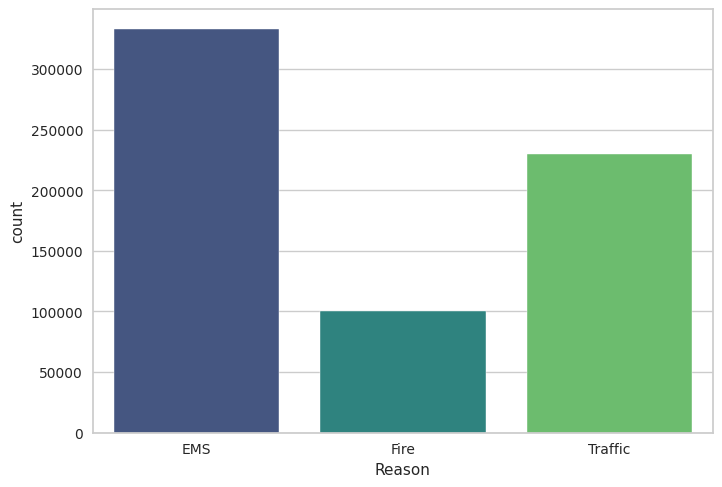

In [ ]:
#countplot of 911 calls by reason using seaborn
sns.set_style('whitegrid')
ax=sns.countplot(x='Reason',data=df,palette='viridis')


In [ ]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [ ]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

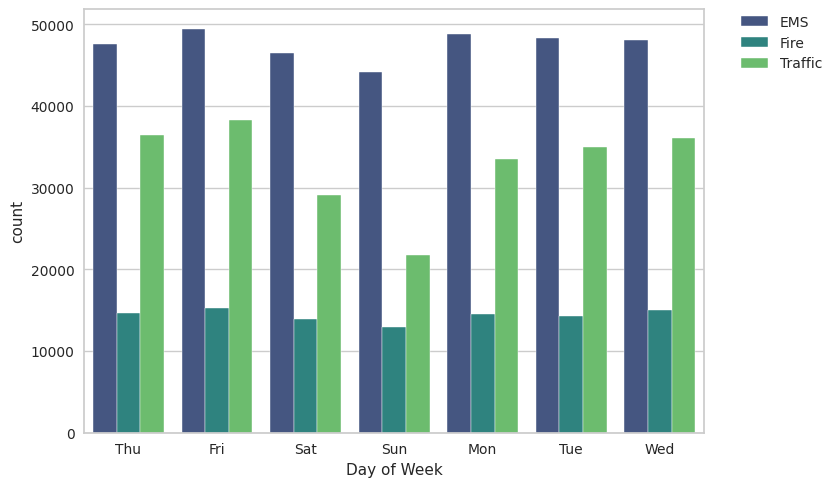

In [ ]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

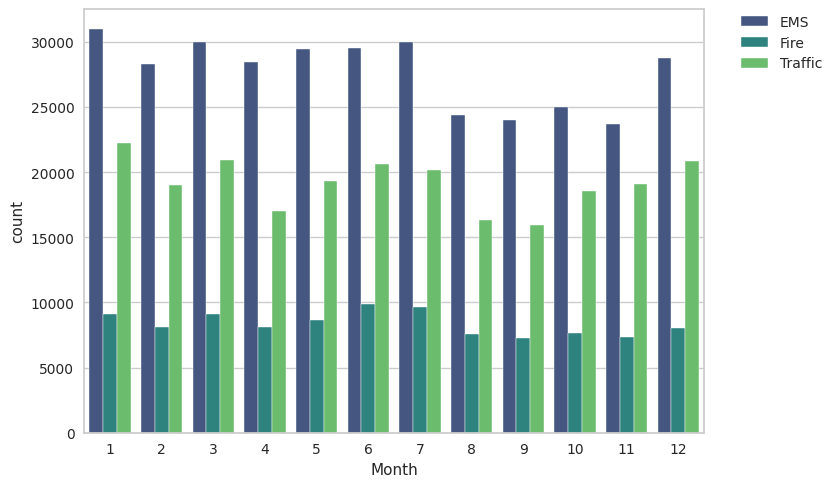

In [ ]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,title,timeStamp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,
1,62336,62336,62336,62336,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,55427,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,60027,60027,60027,60027,60027,60027,60027
4,53671,53671,53671,53671,53671,53671,53671,53671,53671,53671
5,57509,57509,57509,57509,57509,57509,57509,57509,57509,57509


<Axes: xlabel='Month'>

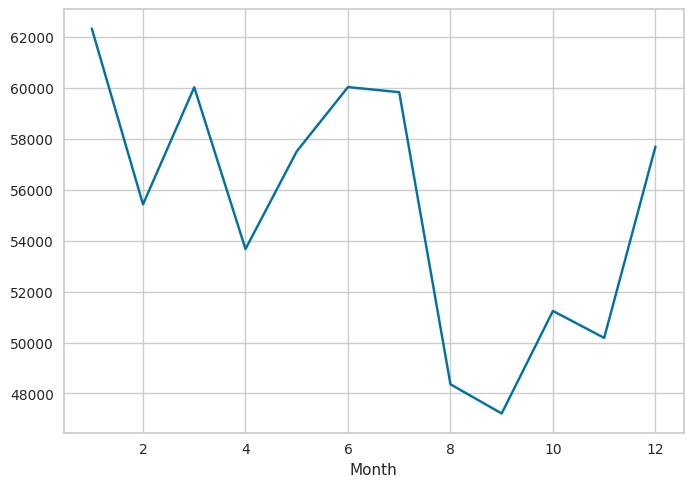

In [ ]:
# Could be any column
byMonth['desc'].plot()


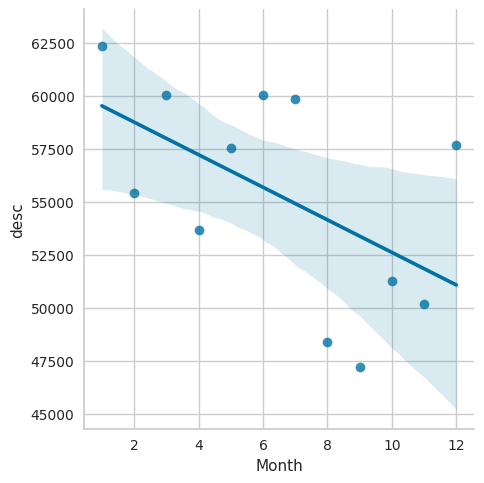

In [ ]:
sns.lmplot(x='Month',y='desc',data=byMonth.reset_index())

Creating a plot count of 911 calls

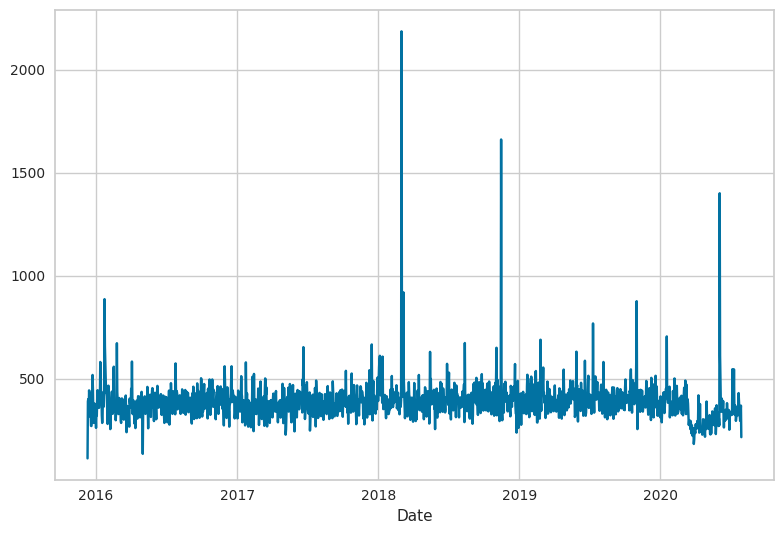

In [ ]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())
df.groupby('Date').count()['desc'].plot()
plt.tight_layout()

plotting separate plots with each representing reasons for 911 call

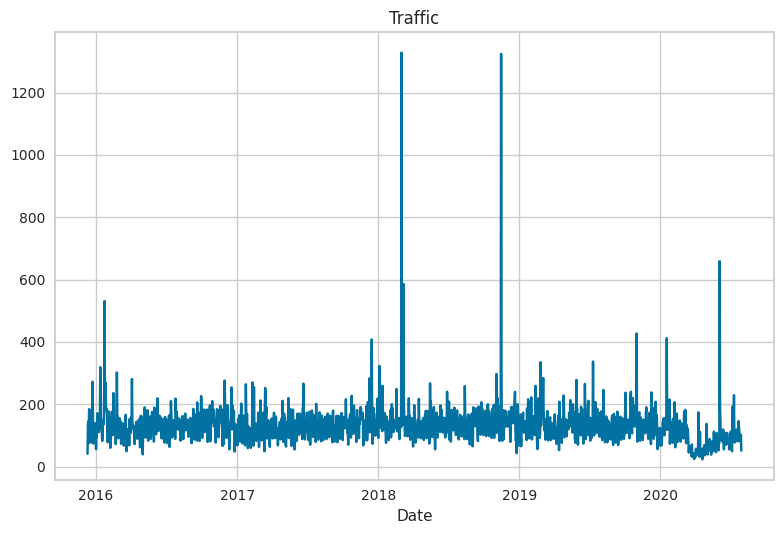

In [ ]:
df[df['Reason']=='Traffic'].groupby('Date').count()['desc'].plot()
plt.title('Traffic')
plt.tight_layout()

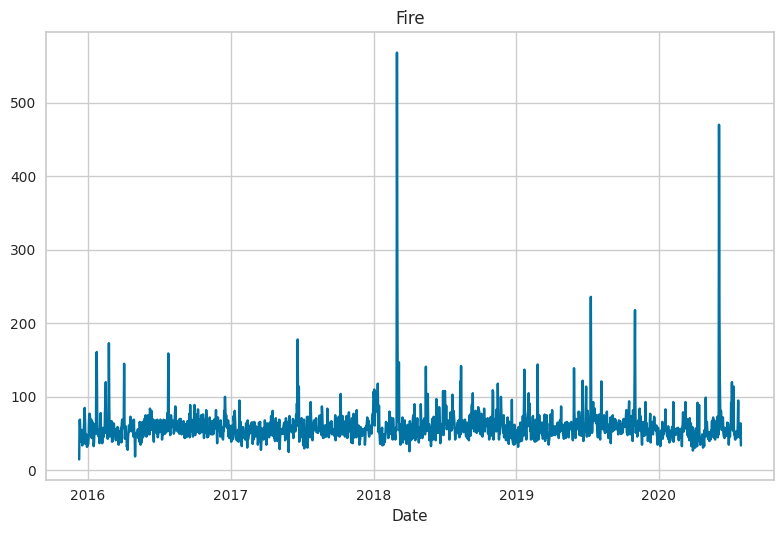

In [ ]:
df[df['Reason']=='Fire'].groupby('Date').count()['desc'].plot()
plt.title('Fire')
plt.tight_layout()

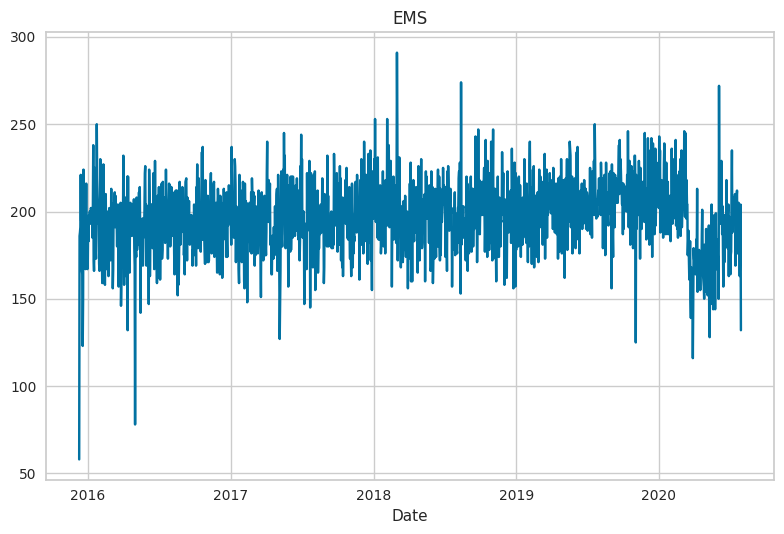

In [ ]:
df[df['Reason']=='EMS'].groupby('Date').count()['desc'].plot()
plt.title('EMS')
plt.tight_layout()

day of week v/s hour

creating heatmaps

In [ ]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


<Axes: xlabel='Hour', ylabel='Day of Week'>

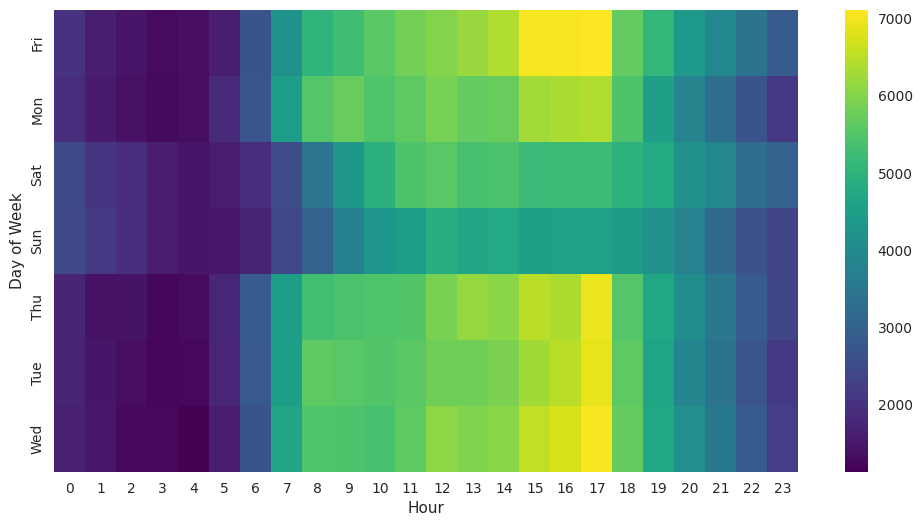

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

creating a clustermap using dataframe

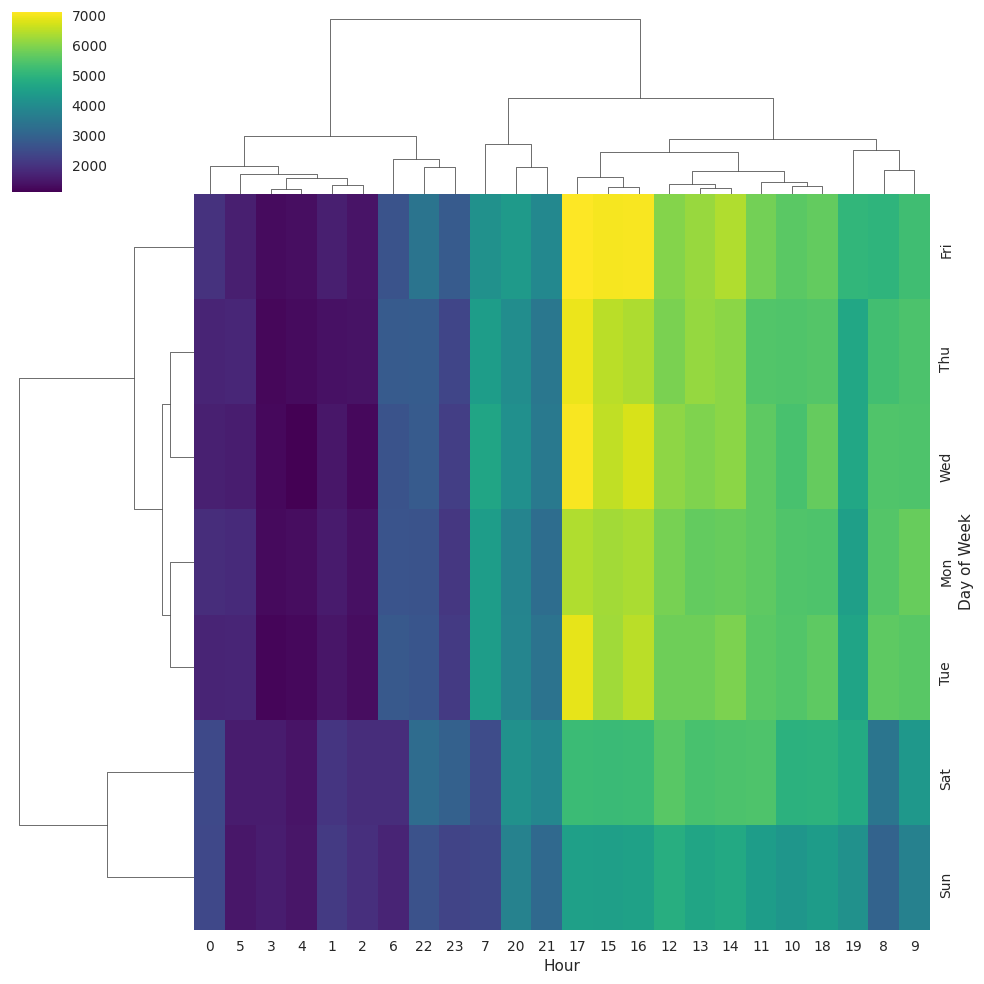

In [ ]:
sns.clustermap(dayHour,cmap='viridis')

day of week v/s month

In [ ]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


In [ ]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1


<Axes: xlabel='Month', ylabel='Day of Week'>

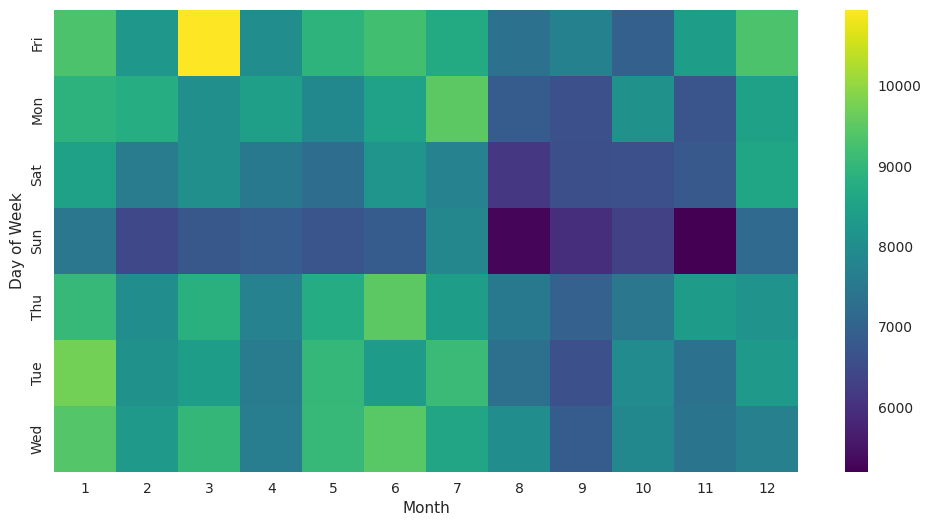

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

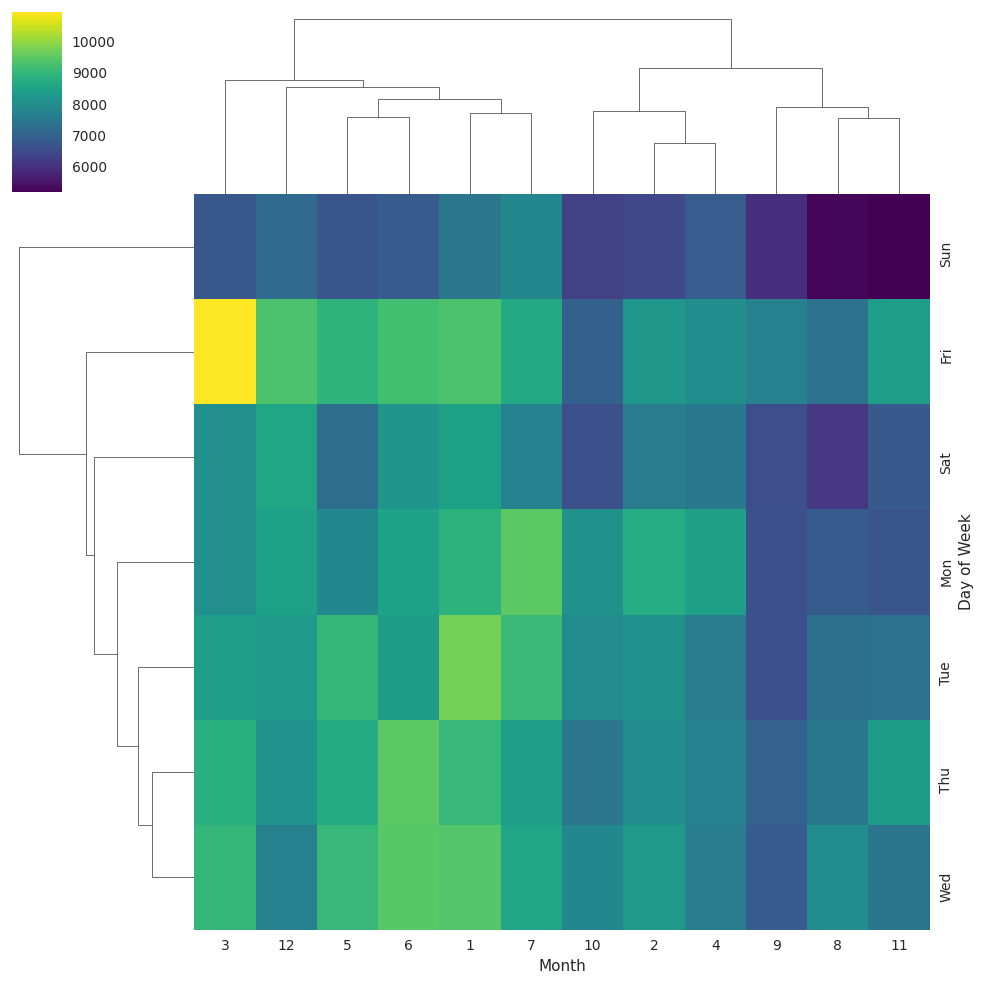

In [ ]:
#clustermap
sns.clustermap(dayMonth,cmap='viridis')

In [ ]:
hourMonth = df.groupby(by=['Month','Hour']).count()['Reason'].unstack()
hourMonth.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Month,,,,,,,,,,,,,,,,,,,,,
1,1308,1051,1056,969,962,1129,1891,2706,3551,3441,...,3629,3709,3678,4171,3535,2985,2467,2180,1829,1550
2,1163,996,873,756,827,1011,1567,2525,2975,3044,...,3256,3441,3356,3284,3221,2806,2343,2053,1760,1466
3,1275,1086,978,870,805,1072,1530,2405,3030,3229,...,3740,3999,3979,3882,3092,3011,2629,2291,1796,1468
4,1051,946,825,714,792,870,1417,2189,2663,2887,...,3310,3489,3616,3440,3018,2513,2293,1919,1640,1338
5,1198,988,871,834,805,905,1481,2364,2807,3085,...,3519,3765,3881,3854,3170,2725,2571,2211,1757,1428


<Axes: xlabel='Hour', ylabel='Month'>

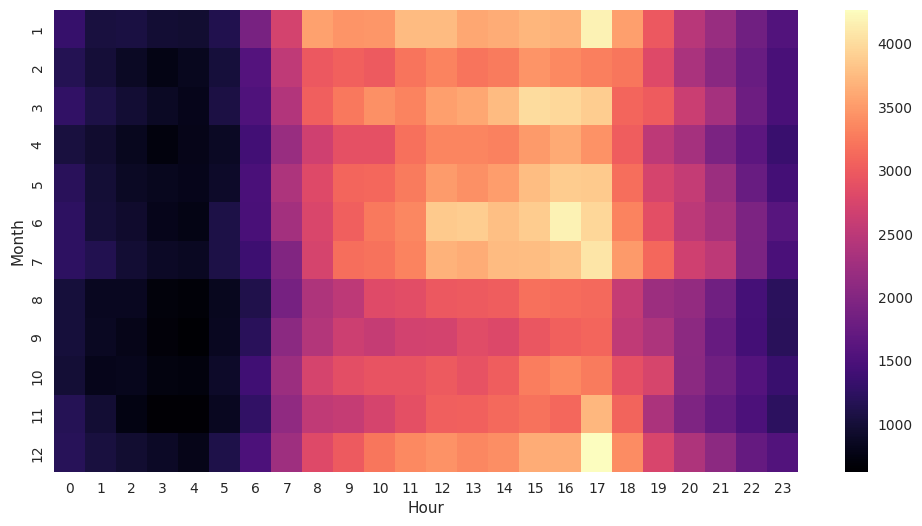

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(hourMonth,cmap='magma')

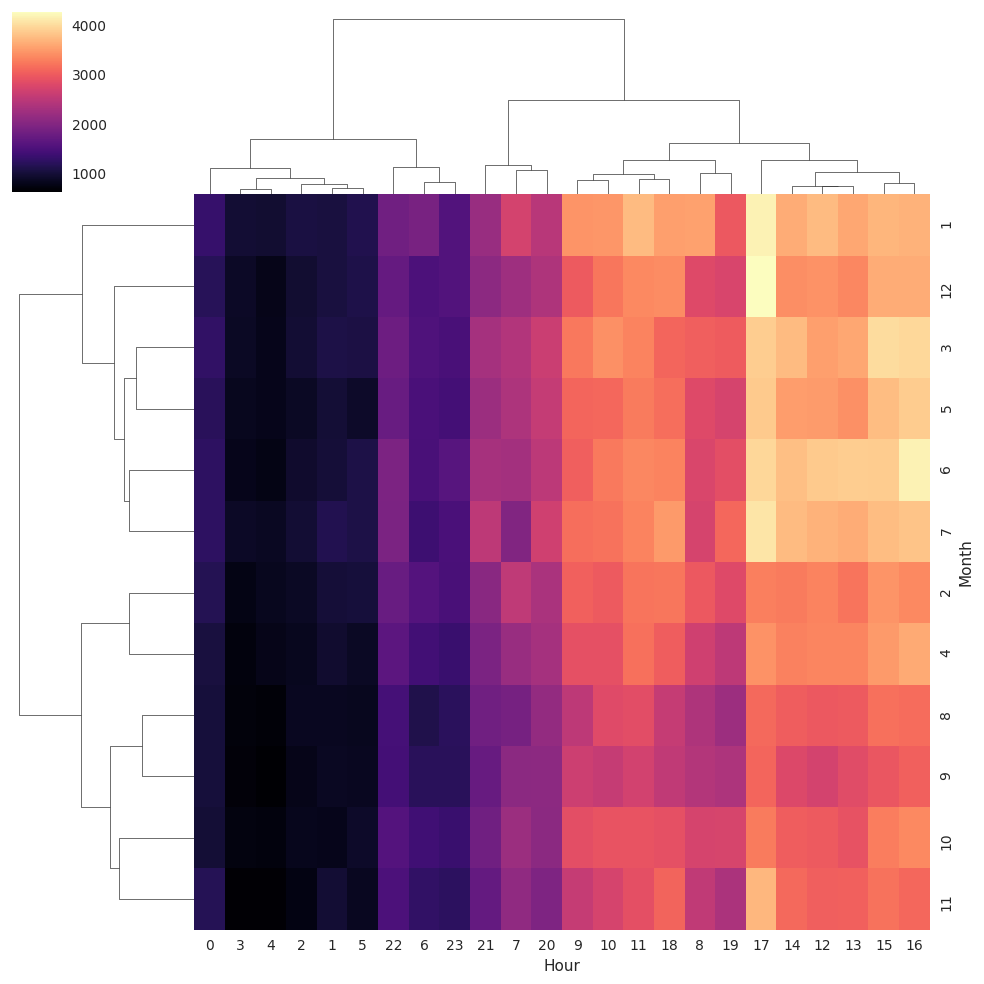

In [ ]:
#clustermap
sns.clustermap(hourMonth,cmap='magma')

LONGITUDE and LATITUDE

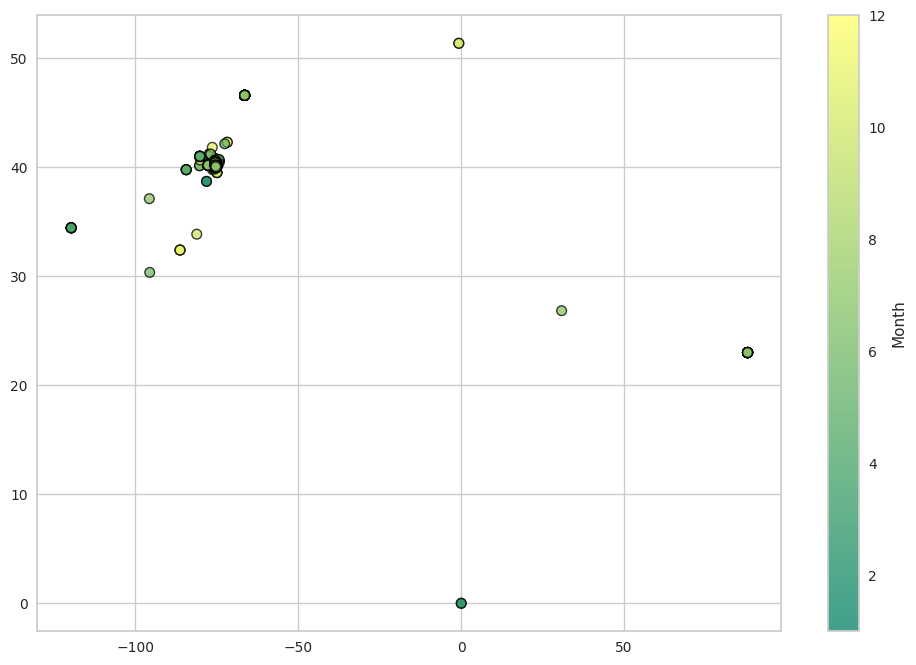

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(df.lng, df.lat, c=df.Month, cmap='summer', 
            edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Month')

K MEANS CLUSTERING ON THE DATA

In [ ]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1


In [ ]:
df_newer = df[(df['lng']<=-60) & (df['lng']>=-80) & (df['lat']>=39) & (df['lat']<=41)]

In [ ]:
df_newer[df_newer['lng']>=60].count()

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64

In [ ]:
clus_k_ori=df_newer[['lat','lng']]
clus_k_ori.dtypes

lat    float64
lng    float64
dtype: object

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

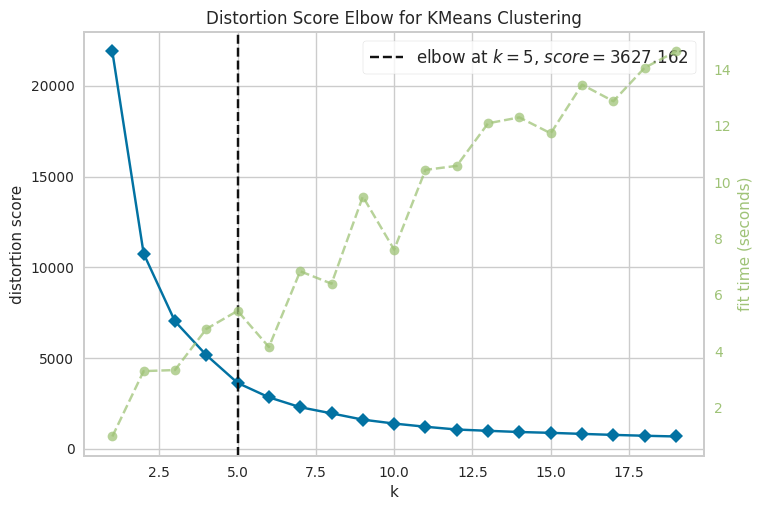

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model_ori = KMeans() 
visualizer = KElbowVisualizer(model_ori, k = (1, 20)) #k = 1 to 19
visualizer.fit(clus_k_ori) #finding the optimal no of clusters elbow method
visualizer.show()

In [ ]:
kmeans_ori = KMeans(n_clusters = 5, random_state = 0) #k = 6
kmeans_ori.fit(clus_k_ori)# k means of the data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [ ]:
centroids_k_ori = kmeans_ori.cluster_centers_
centroids_k_ori
#values of the centroids of the clusters


array([[ 40.24511642, -75.30572251],
       [ 40.09059083, -75.32930513],
       [ 40.25514292, -75.56251227],
       [ 40.12675013, -75.14068568],
       [ 40.1639895 , -77.69823535]])

In [ ]:
clocation_k_ori = pd.DataFrame(centroids_k_ori, columns = ['Latitude', 'Longitude'])
clocation_k_ori

,Latitude,Longitude
0,40.245116,-75.305723
1,40.090591,-75.329305
2,40.255143,-75.562512
3,40.126750,-75.140686
4,40.163990,-77.698235


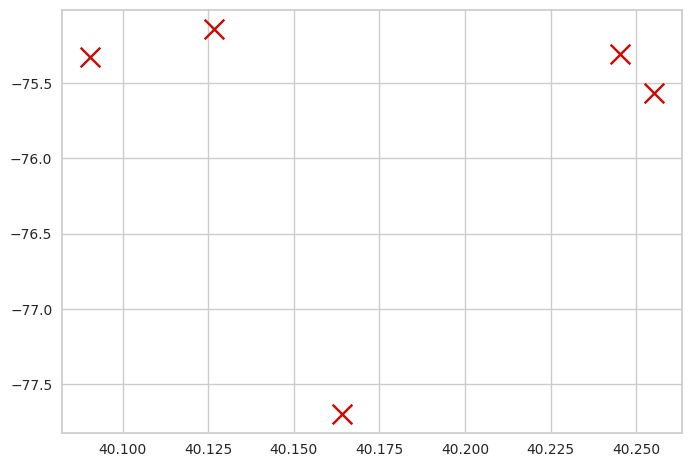

In [ ]:
plt.scatter(clocation_k_ori['Latitude'], clocation_k_ori['Longitude'], marker = "x", color = 'r', s = 200)
#ploting the location of centroids

In [ ]:
centroid_k_ori = clocation_k_ori.values.tolist()

map_k_ori = folium.Map(location = [40.238761, -75.501975], zoom_start = 10)
for point in range(0, len(centroid_k_ori)):
    folium.Marker(centroid_k_ori[point], popup = centroid_k_ori[point]).add_to(map_k_ori)

map_k_ori
#showing the centroids location in map

In [ ]:
label_k_ori = kmeans_ori.labels_
label_k_ori

array([2, 0, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
df_new_k = df_newer.copy()
df_new_k['Clusters'] = label_k_ori
df_new_k
#adding a row Clusters to show the cluster a point belongs to

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Clusters
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,2
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,0
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2
...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,1
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,1
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,1
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,1


In [ ]:
#Getting unique labels
 
u_labels = np.unique(label_k_ori)
u_labels

array([0, 1, 2, 3, 4], dtype=int32)

In [ ]:
#array of cluster values
ymeans=np.copy(df_new_k['Clusters'] )
ymeans

array([2, 0, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
df_new_k['Clusters']

0         2
1         0
2         1
3         1
4         2
         ..
663517    1
663518    1
663519    1
663520    1
663521    1
Name: Clusters, Length: 663319, dtype: int32

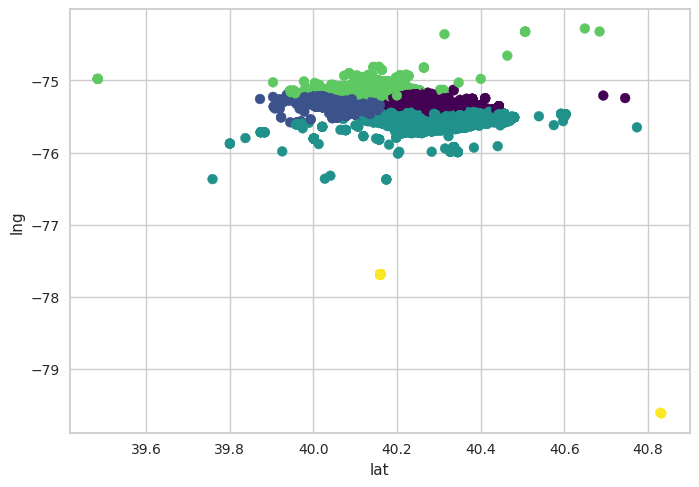

In [ ]:
#scatter plot of the clusters
fig,ax=plt.subplots()
ax.scatter(df_newer['lat'], df_newer['lng'], c=ymeans, s=50, cmap='viridis')
ax.set_xlabel("lat")
ax.set_ylabel("lng")
plt.show()

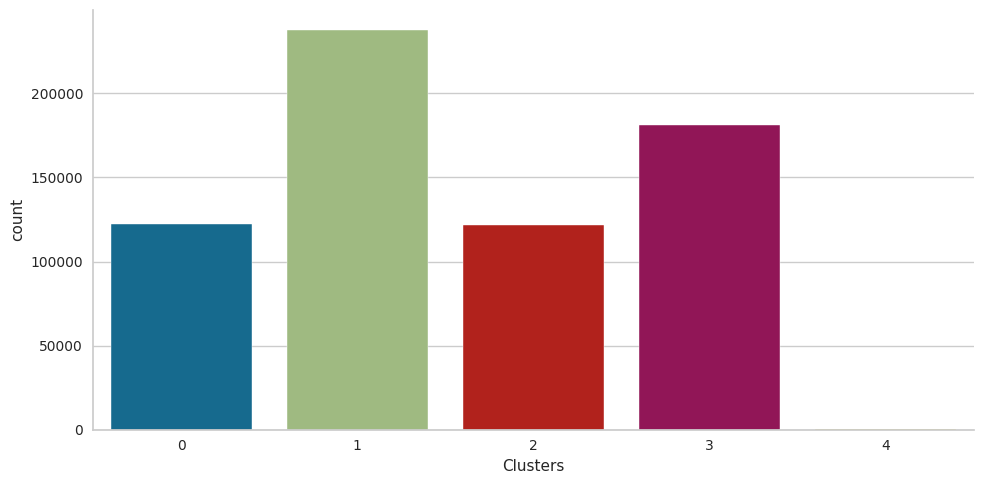

In [ ]:
sns.catplot(data = df_new_k, x = "Clusters", kind = "count", aspect = 2)
#no of pickups in different clusters

In [ ]:
df_cluster0=df_new_k[df_new_k['Clusters']==0]
df_cluster0


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Clusters
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,0
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,0
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,0
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,0
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:33:50,MONTGOMERY,RT202 PKWY & KNAPP RD,1,0
...,...,...,...,...,...,...,...,...,...,...
663484,40.240233,-75.244606,NORTH WALES RD & HARBOB LN; MONTGOMERY; 2020-0...,19454.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 14:11:52,MONTGOMERY,NORTH WALES RD & HARBOB LN,1,0
663485,40.251523,-75.329557,DOCK DR & DEAD END; TOWAMENCIN; Station 345B;...,NaN,EMS: FALL VICTIM,2020-07-29 14:23:55,TOWAMENCIN,DOCK DR & DEAD END,1,0
663489,40.249372,-75.344106,EXTENSION PENNSYLVANIA TPKE & MORRIS RD; TOWAM...,19438.0,Traffic: ROAD OBSTRUCTION -,2020-07-29 14:38:48,TOWAMENCIN,EXTENSION PENNSYLVANIA TPKE & MORRIS RD,1,0
663496,40.248522,-75.286242,5TH ST & UNNAMED ALY; LANSDALE; Station 345; ...,19446.0,EMS: GENERAL WEAKNESS,2020-07-29 15:09:05,LANSDALE,5TH ST & UNNAMED ALY,1,0
